# <font>2.Interact with the OpenWeatherMap API using the API key to retrieve weather data for a specific location</font>

In [1]:
import requests
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
url = 'https://api.openweathermap.org/data/2.5/forecast?lat=44.34&lon=10.99&appid=42c0eca88838a86ba63' # <-- This is app id also known as api key, which you have to generate your own, and paste it here

#vurl ='https://api.openweathermap.org/data/2.5/weather?lat=44.34&lon=10.99&appid=307d11bca480dd730d99187c926&city_name=London'
response = requests.get(url)
data = response.json()
pretty_json = json.dumps(data,indent=4)
print(pretty_json)

{
    "cod": "200",
    "message": 0,
    "cnt": 40,
    "list": [
        {
            "dt": 1730743200,
            "main": {
                "temp": 280.83,
                "feels_like": 280.83,
                "temp_min": 280.83,
                "temp_max": 283.19,
                "pressure": 1026,
                "sea_level": 1026,
                "grnd_level": 958,
                "humidity": 96,
                "temp_kf": -2.36
            },
            "weather": [
                {
                    "id": 800,
                    "main": "Clear",
                    "description": "clear sky",
                    "icon": "01n"
                }
            ],
            "clouds": {
                "all": 0
            },
            "wind": {
                "speed": 1.32,
                "deg": 227,
                "gust": 0.77
            },
            "visibility": 10000,
            "pop": 0,
            "sys": {
                "pod": "n"
            },
            

# 3.Extract relevant weather attributes such as temperature, humidity, wind speed, and  precipitation from the API response

In [6]:
data_struct = []
for record in data['list']:
    temp = record['main']['temp']
    humid = record['main']['humidity']
    wind_speed = record['wind']['speed']
    desp =record['weather'][0]['description']
    date_time = record['dt_txt']

    data_struct.append({'Temperature':temp,'Humidity':humid,'Wind Speed':wind_speed,'Weather Description':desp,'Date Time':date_time})

data_df = pd.DataFrame(data_struct)
data_df[['Date','Time']] = data_df['Date Time'].str.split(' ',expand=True)
data_df.head(10)


,Temperature,Humidity,Wind Speed,Weather Description,Date Time,Date,Time
0,280.83,96,1.32,clear sky,2024-11-04 18:00:00,2024-11-04,18:00:00
1,281.33,94,1.25,clear sky,2024-11-04 21:00:00,2024-11-04,21:00:00
2,281.42,90,1.38,clear sky,2024-11-05 00:00:00,2024-11-05,00:00:00
3,281.21,83,1.33,scattered clouds,2024-11-05 03:00:00,2024-11-05,03:00:00
4,280.89,81,1.39,broken clouds,2024-11-05 06:00:00,2024-11-05,06:00:00
5,285.66,69,0.72,overcast clouds,2024-11-05 09:00:00,2024-11-05,09:00:00
6,287.34,67,1.88,overcast clouds,2024-11-05 12:00:00,2024-11-05,12:00:00
7,285.33,86,1.37,overcast clouds,2024-11-05 15:00:00,2024-11-05,15:00:00
8,282.55,93,1.05,overcast clouds,2024-11-05 18:00:00,2024-11-05,18:00:00
9,282.01,93,1.24,overcast clouds,2024-11-05 21:00:00,2024-11-05,21:00:00


In [ ]:
data_df.shape

(40, 7)

# 4.Clean and preprocess the retrieved data, handling missing values or inconsistent  formats.

In [ ]:
data_df.isnull().sum()

,0
Temperature,0
Humidity,0
Wind Speed,0
Weather Description,0
Date Time,0
Date,0
Time,0


In [ ]:
data_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Temperature          40 non-null     float64
 1   Humidity             40 non-null     int64  
 2   Wind Speed           40 non-null     float64
 3   Weather Description  40 non-null     object 
 4   Date Time            40 non-null     object 
 5   Date                 40 non-null     object 
 6   Time                 40 non-null     object 
dtypes: float64(2), int64(1), object(4)
memory usage: 2.3+ KB


# 5.Perform data modeling to analyze weather patterns, such as calculating average temperature, maximum/minimum values, or trends over time.

In [ ]:
data_df.describe()

,Temperature,Humidity,Wind Speed
count,40.000000,40.000000,40.000000
mean,282.972250,77.100000,1.241250
std,3.028698,12.421652,0.555902
min,278.180000,51.000000,0.190000
25%,280.550000,69.500000,0.857500
50%,282.590000,81.500000,1.135000
75%,284.550000,86.250000,1.662500
max,289.890000,93.000000,2.370000


# <font>6.Visualize the weather data using appropriate plots, such as line charts, bar plots, or scatter plots, to represent temperature changes, precipitation levels, or wind speed variations.</font>

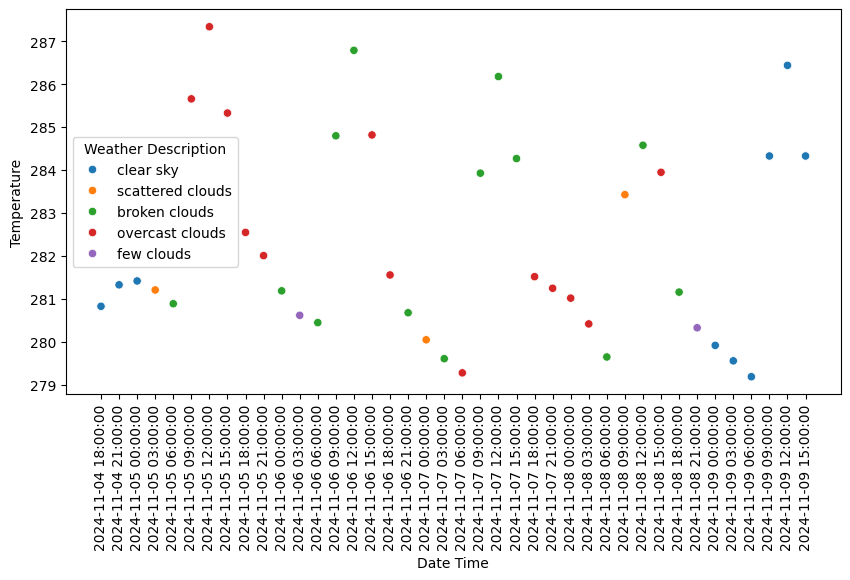

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(10,5))
sns.scatterplot(x=data_df['Date Time'],
                y=data_df['Temperature'],
                hue=data_df['Weather Description'])

plt.xticks(rotation=90);

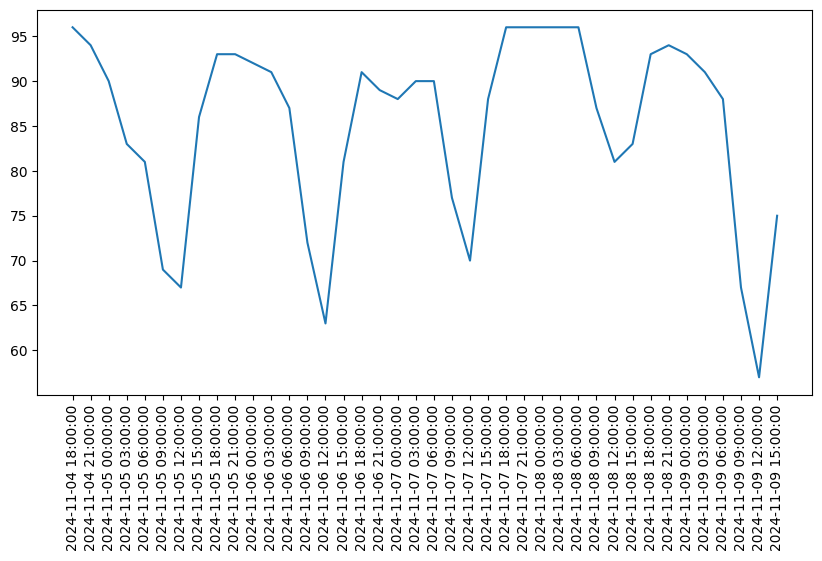

In [8]:

plt.figure(figsize=(10,5))
plt.plot(data_df['Date Time'],data_df['Humidity'])
plt.xticks(rotation=90);

# <font>7.Apply data aggregation techniques to summarize weather statistics by specific time periods</font>                              

In [ ]:
data_df.groupby('Date').agg({'Temperature' : 'mean','Wind Speed':'mean'})

,Temperature,Wind Speed
Date,,
2024-11-03,283.336000,1.582000
2024-11-04,284.510000,1.510000
2024-11-05,284.530000,1.382500
2024-11-06,283.743750,1.008750
2024-11-07,282.703750,0.983750
2024-11-08,283.213333,0.663333


# <font>9.Explore and visualize relationships between weather attributes, such as temperature and humidity, using correlation plots or heatmaps.</font>

<Axes: >

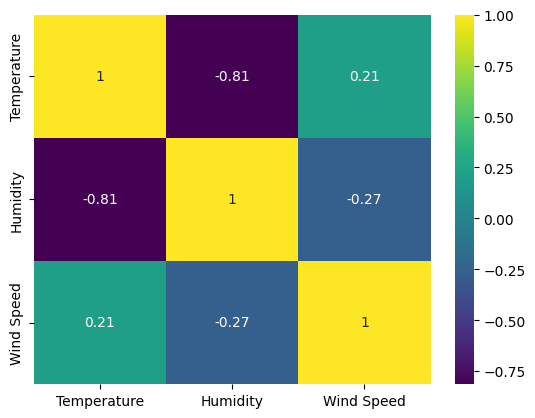

In [15]:
sns.heatmap(data_df[['Temperature','Humidity','Wind Speed']].corr(),annot=True,cmap='viridis')